<a href="https://colab.research.google.com/github/daviramos1c/Python/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

<Axes: xlabel='Turma', ylabel='count'>

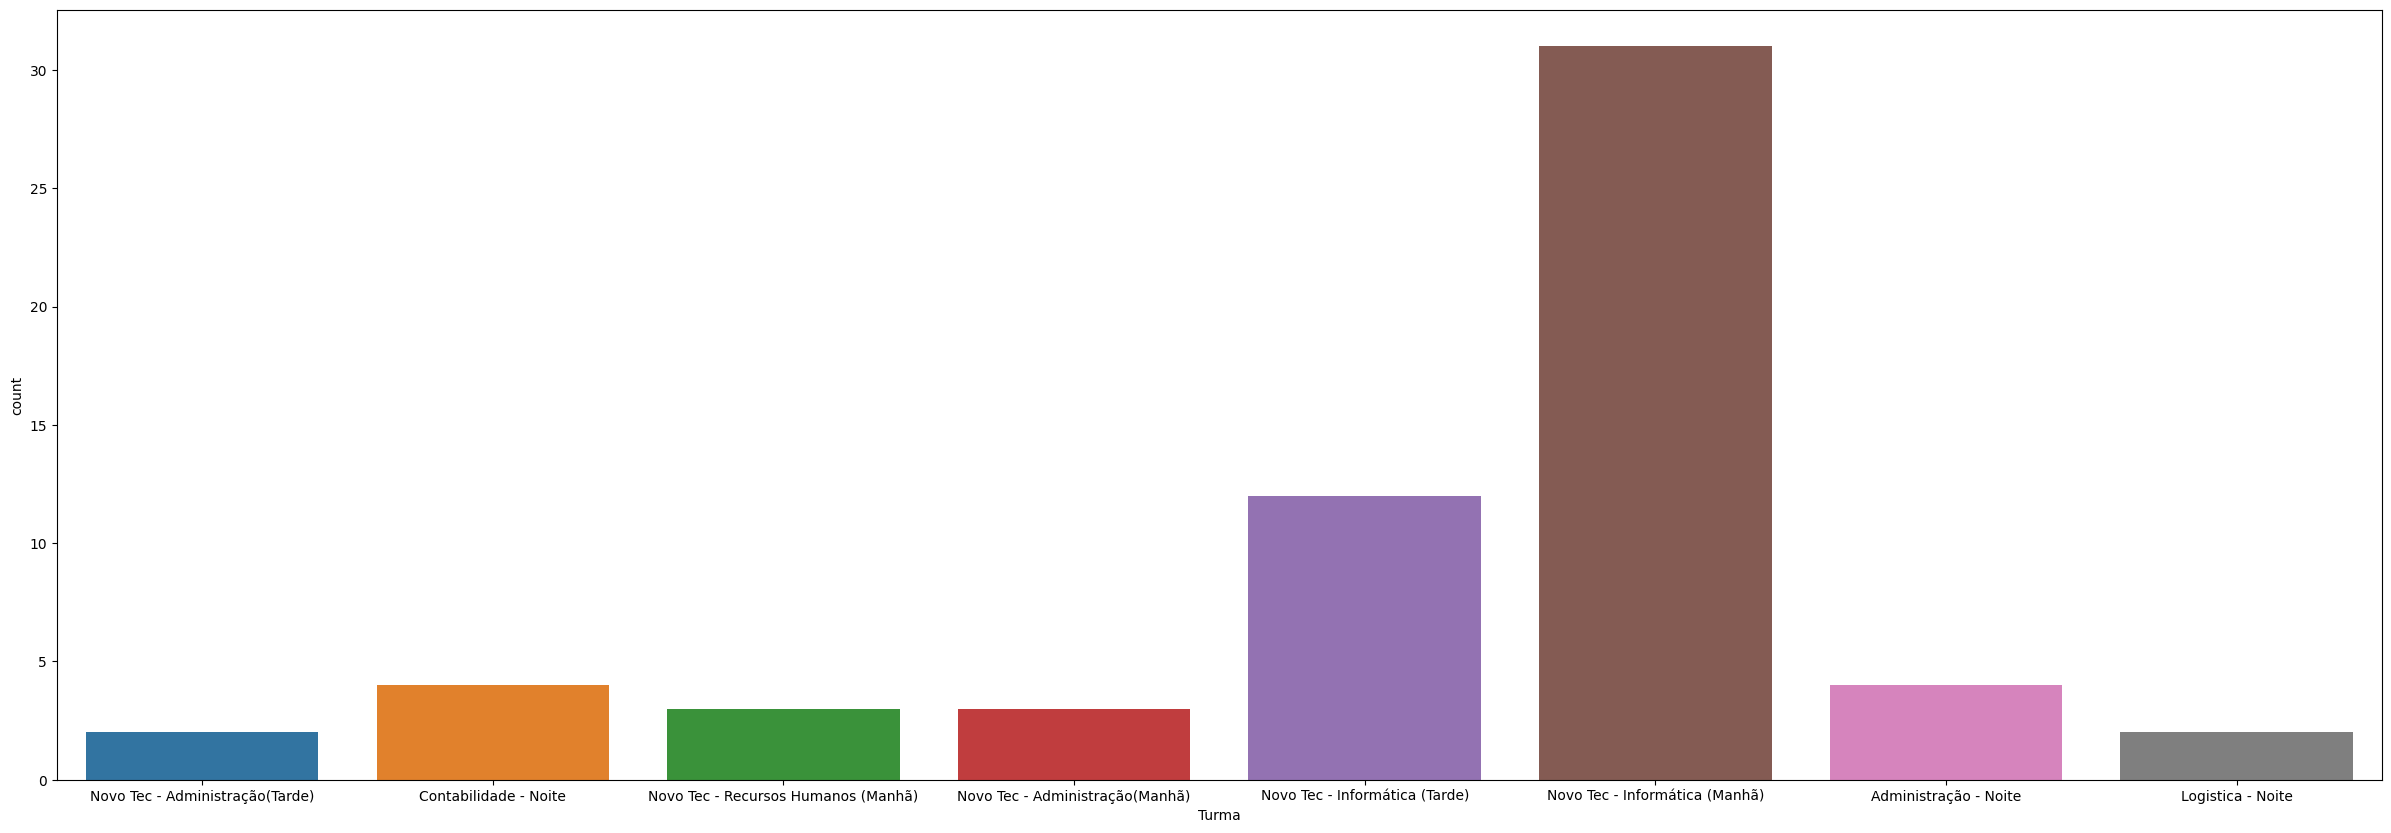

In [ ]:
plt.subplots(figsize=(30, 10))
sns.countplot(x=base["Turma"])

Text(0.5, 1.0, 'Alunos legais?')

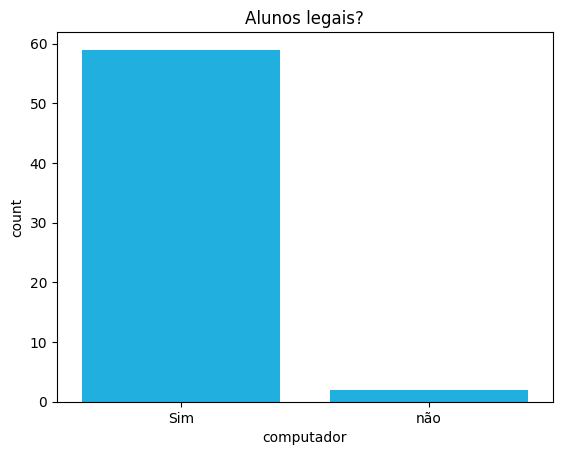

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=base['computador'], color='#00BFFF');
plt.title('Alunos legais?')

In [ ]:
base['Turma'].value_counts()

Novo Tec - Informática (Manhã)         31
Novo Tec - Informática (Tarde)         12
Contabilidade - Noite                   4
Administração - Noite                   4
Novo Tec - Recursos Humanos (Manhã)     3
Novo Tec - Administração(Manhã)         3
Novo Tec - Administração(Tarde)         2
Logistica - Noite                       2
Name: Turma, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

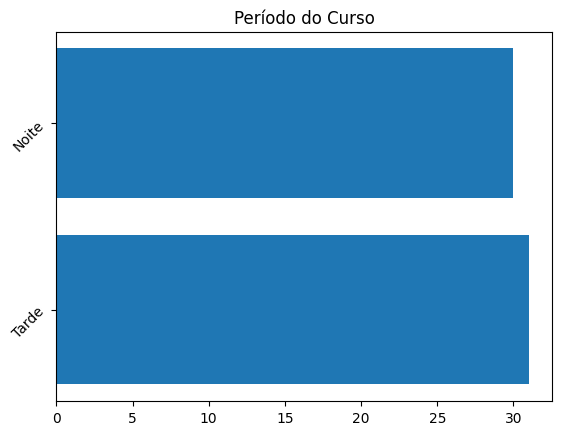

In [ ]:
plt.barh(x, y)
plt.yticks(rotation= 45)
plt.title('Período do Curso')
plt.show()

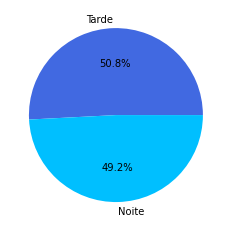

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!phyton pt

/bin/bash: line 1: phyton: command not found


In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 10:56:12.302623: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 23.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

Stop_Words = Palavras secundárias que não tem sentido sozinhos

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
#Conta a quantidade de palavras
len(stop_words)

417

In [ ]:
"possui" in stop_words

True

In [ ]:
pln.Defaults.stop_words.add("possui")

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

,Turma,interesse,computador,motivacao,limpa
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...,liga aprender tecnologia
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...,conseguir automatizar processos trabalho
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q...",obter conhecimento solicitado mercado trabalho
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...,python linguagens programação fácil executar p...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos,aprimorar
...,...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...,busca conhecimentos agregar vida
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática,ampliar conhecimentos informática


In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programação fácil executar projetos sabendo python aprimorar aprimorar venho interessando tecnologia conhecimento adquirir conhecimentos agregar currículo achei interessante curso melhorar conhecimento python interessei gosto programação estudei python conhecimento indicação documentário coded bias desenvolvi interesse ia expandir conhecimentos futuro melhor incrementar currículo interesse interesse explorar áreas informática estudei python conhecer mexe funciona adquirir conhecimento busco melhor capacitação ingressar mercado trabalho interesse tema curso gosto aprender coisas acredito oportunidade aparece agarrada tema curso desperta interesse experiência area interesse ia aprender tecnologias atuais ampliar conhecimento áreae decidindo profissãoe aprender fundamental aprender coisas tornar profissional qualificado curiosidade desenvolvimento ia python g

NameError: ignored

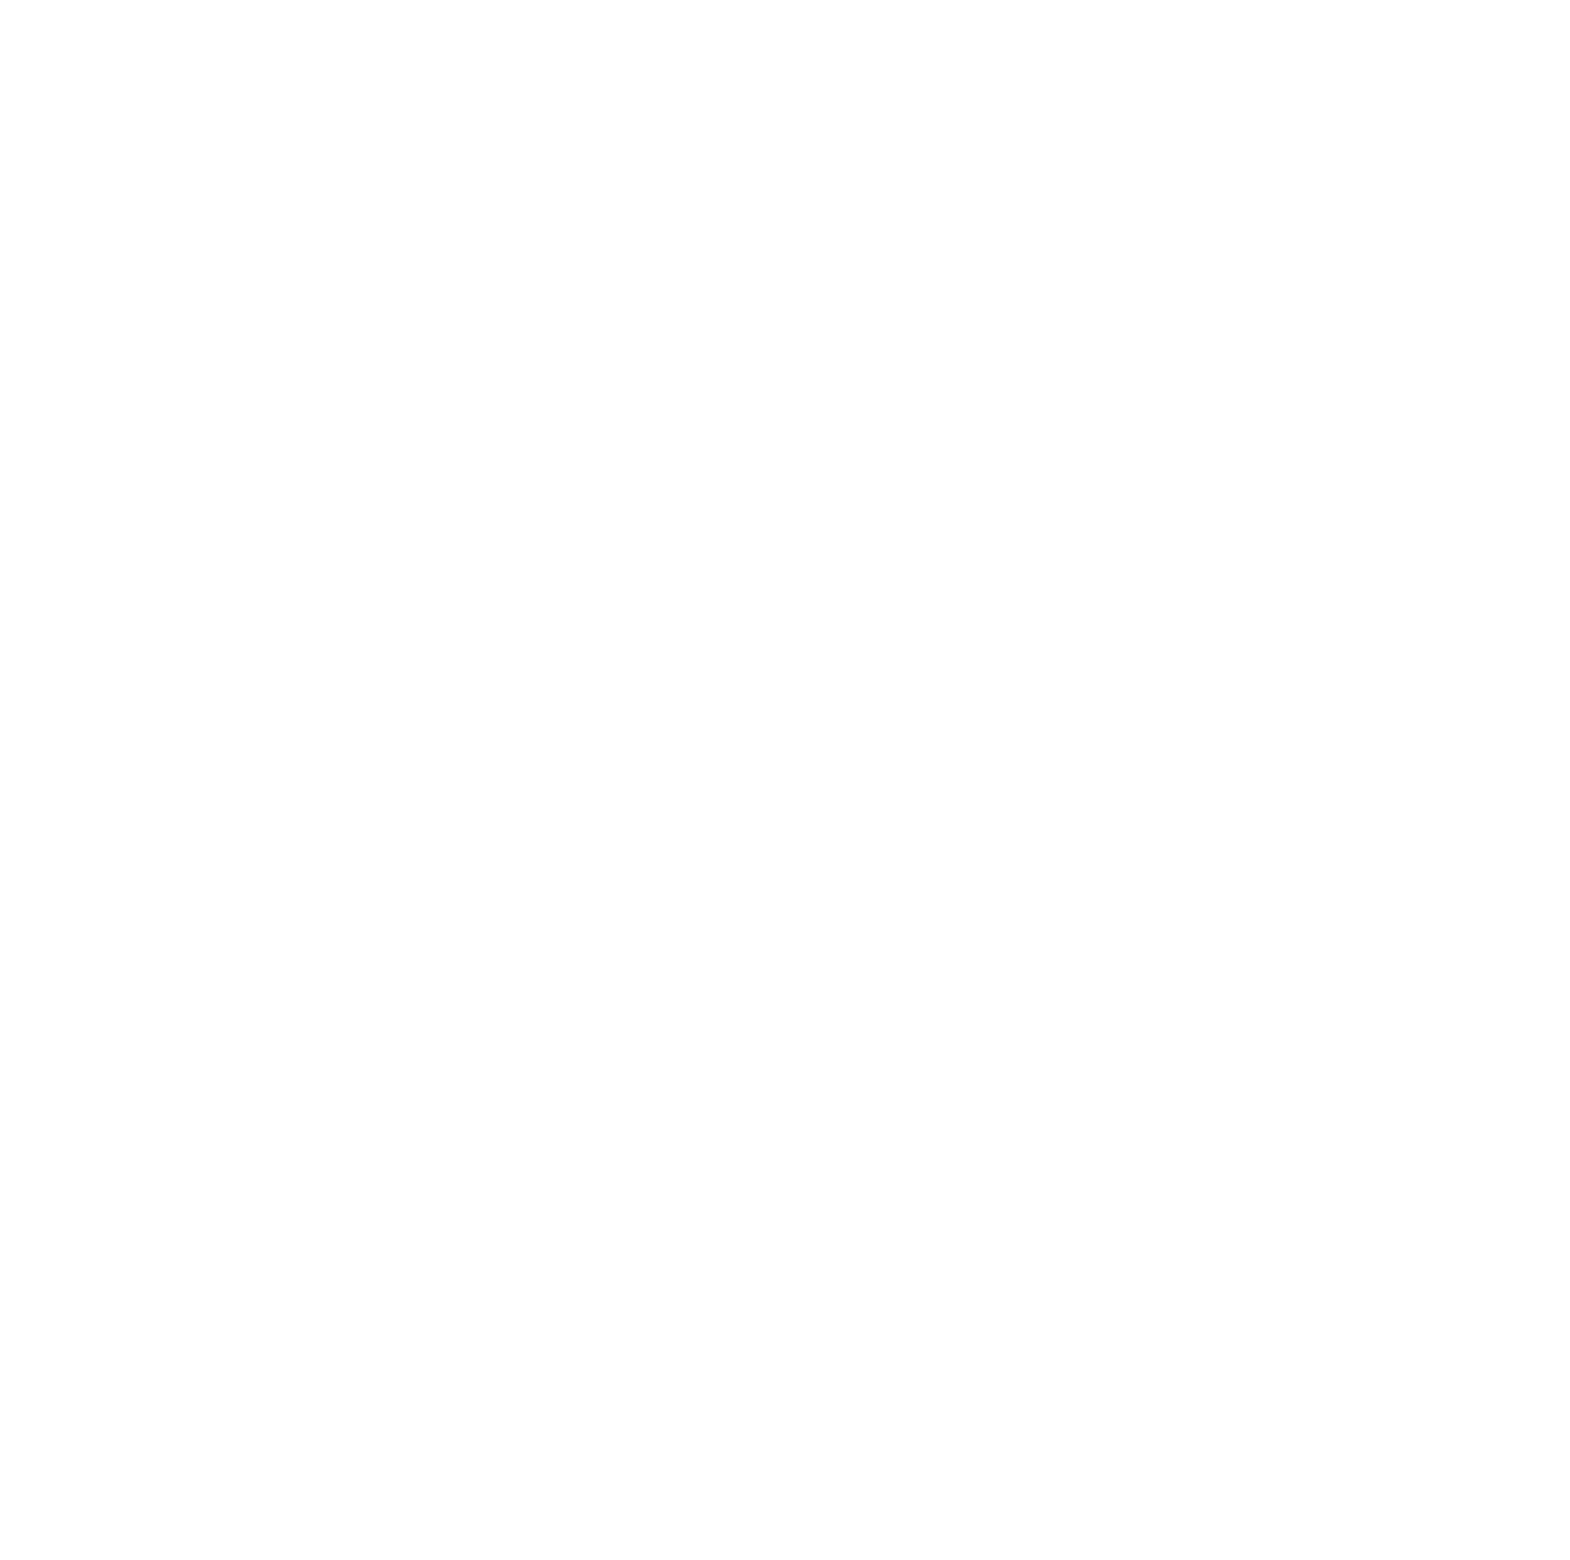

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(juntandotudo))